In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf

import random

from keras import Model

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import numpy as np

import os

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from ann_visualizer.visualize import ann_viz
from sklearn.metrics import confusion_matrix

In [3]:
character_1best_files = []
token_1best_files = []
character_2mid_files = []
token_2mid_files = []
character_3mid_files = []
token_3mid_files = []
character_4worst_files = []
token_4worst_files = []

character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_1best"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_1best"

character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_2mid"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_2mid"

character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_3mid"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_3mid"

character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_4worst"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_4worst"

for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))

In [4]:
def matrixFileToMatrix(files, matrixList):
    for file in files:
        matrix = []
        with open(file, 'r') as f:
            matrix = [[float(num) for num in line.split(',') if num != "\n"][:754] for line in f ]
        matrixList.append(np.array(matrix))

In [5]:
random.seed(100)
character_1best_files = random.sample(character_1best_files, k = 2000)
random.seed(100)
token_1best_files = random.sample(token_1best_files, k= 2000)
random.seed(100)
character_2mid_files = random.sample(character_2mid_files, k = 2000)
random.seed(100)
token_2mid_files = random.sample(token_2mid_files, k= 2000)
random.seed(100)
character_3mid_files = random.sample(character_3mid_files, k = 2000)
random.seed(100)
token_3mid_files = random.sample(token_3mid_files, k= 2000)
random.seed(100)
character_4worst_files = random.sample(character_4worst_files, k = 2000)
random.seed(100)
token_4worst_files = random.sample(token_4worst_files, k= 2000)

In [6]:
#Adding Scalabrino
character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"

character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"

character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"

for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))


In [7]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []


matrixFileToMatrix(character_1best_files, best1_input_chars)
matrixFileToMatrix(token_1best_files, best1_input_tokens)

print("done")

matrixFileToMatrix(character_2mid_files, mid2_input_chars)
matrixFileToMatrix(token_2mid_files, mid2_input_tokens)

print("done")

matrixFileToMatrix(character_3mid_files, mid3_input_chars)
matrixFileToMatrix(token_3mid_files, mid3_input_tokens)

print("done")

matrixFileToMatrix(character_4worst_files, worst4_input_chars)
matrixFileToMatrix(token_4worst_files, worst4_input_tokens)

done
done
done


In [8]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

for x in best1_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,0,0,1])

for x in mid2_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,0,1,0])
    
for x in mid3_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,1,0,0])

for x in worst4_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([1,0,0,0])



for x in best1_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,0,0,1])

for x in mid2_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,0,1,0])

for x in mid3_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,1,0,0])

for x in worst4_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([1,0,0,0])

In [9]:
input4_characters_x = np.array(input4_characters_x)
input4_characters_y = np.array(input4_characters_y)

input4_tokens_x = np.array(input4_tokens_x)
input4_tokens_y = np.array(input4_tokens_y)

In [10]:
print(input4_characters_x.shape)
print(input4_characters_y.shape)

print(input4_tokens_x.shape)
print(input4_tokens_y.shape)

(8200, 50, 754)
(8200, 4)
(8200, 50, 754)
(8200, 4)


In [11]:
input4_characters_x, input4_characters_y = shuffle(input4_characters_x, input4_characters_y, random_state=0)

input4_tokens_x, input4_tokens_y = shuffle(input4_tokens_x, input4_tokens_y, random_state=0)

In [12]:
x_characters_train4, x_characters_test4, y_characters_train4, y_characters_test4 = train_test_split(
    input4_characters_x, input4_characters_y, test_size = 0.2, random_state=24)

#x_characters_train4, x_characters_valid4, y_characters_train4, y_characters_valid4 = train_test_split(
 #   x_characters_train4, y_characters_train4, test_size = 0.125, random_state=24)

x_tokens_train4, x_tokens_test4, y_tokens_train4, y_tokens_test4 = train_test_split(
    input4_tokens_x, input4_tokens_y, test_size = 0.2, random_state=24)

In [13]:
batch_size = 32
epochs = 6

model_chars_input = Input((50,754,1))

model_chars = Conv2D(100, kernel_size=(2, 754), strides=(1,1),
                 activation='relu')(model_chars_input)
model_chars = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_chars)
model_chars = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_chars)
model_chars = MaxPooling2D(pool_size=(2, 1), strides=(2,1))(model_chars)

model_tokens_input = Input((50,754,1))

model_tokens = Conv2D(100, kernel_size=(2, 754), strides=(1,1),
                 activation='relu')(model_tokens_input)
model_tokens = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_tokens)
model_tokens = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_tokens)
model_tokens = MaxPooling2D(pool_size=(2, 1), strides=(2,1))(model_tokens)


merged = Concatenate()([model_chars, model_tokens])
merged = Flatten()(merged)
#merged = Dense(5, activation='relu')(merged)
merged = Dropout(0.5)(merged)
merged = Dense(4, activation='softmax')(merged)

model_combined4 = Model(inputs=[model_chars_input, model_tokens_input], outputs=[merged])

print(model_combined4.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 754, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 input_2 (InputLayer)           [(None, 50, 754, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 49, 1, 100)   150900      ['input_1[0][0]']                
                                                                                              

In [14]:
model_combined4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

combined4_fit = model_combined4.fit([x_characters_train4, x_tokens_train4], y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=([x_characters_test4, x_tokens_test4], y_characters_test4))
combined4_score = model_combined4.evaluate([x_characters_test4, x_tokens_test4], y_characters_test4, verbose=0)
print('Test loss:', combined4_score[0])
print('Test accuracy:', combined4_score[1])

Epoch 1/6
205/205 [==============================] - 38s 174ms/step - loss: 1.1389 - accuracy: 0.5805 - val_loss: 0.8585 - val_accuracy: 0.6701
Epoch 2/6
205/205 [==============================] - 28s 135ms/step - loss: 0.8430 - accuracy: 0.6694 - val_loss: 0.8027 - val_accuracy: 0.6628
Epoch 3/6
205/205 [==============================] - 27s 132ms/step - loss: 0.7733 - accuracy: 0.6898 - val_loss: 0.7663 - val_accuracy: 0.6957
Epoch 4/6
205/205 [==============================] - 28s 136ms/step - loss: 0.7678 - accuracy: 0.6928 - val_loss: 0.7519 - val_accuracy: 0.6976
Epoch 5/6
205/205 [==============================] - 25s 120ms/step - loss: 0.7385 - accuracy: 0.7003 - val_loss: 0.7534 - val_accuracy: 0.6945
Epoch 6/6
205/205 [==============================] - 29s 143ms/step - loss: 0.7213 - accuracy: 0.7139 - val_loss: 0.7265 - val_accuracy: 0.7030
Test loss: 0.7265322804450989
Test accuracy: 0.7030487656593323


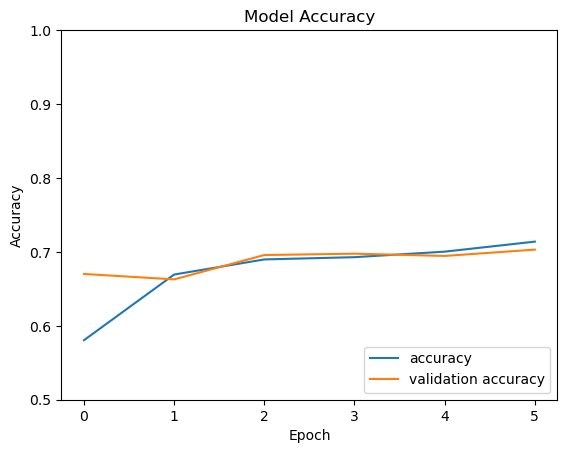

In [37]:
plt.plot(combined4_fit.history['accuracy'], label='accuracy')
plt.plot(combined4_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

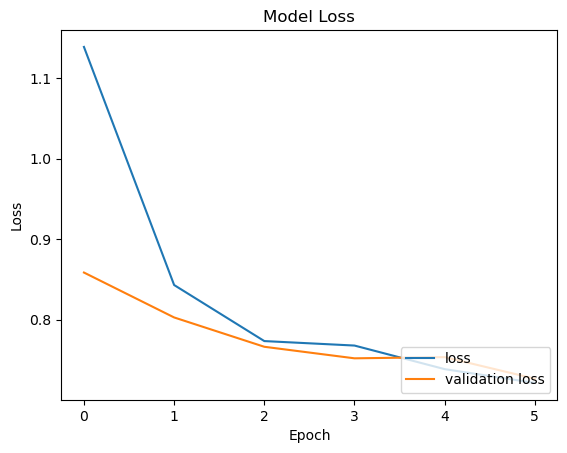

In [16]:
plt.plot(combined4_fit.history['loss'], label='loss')
plt.plot(combined4_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [17]:
mi_predict2 = model_combined4.predict([x_characters_test4, x_tokens_test4])

52/52 [==============================] - 4s 80ms/step


In [18]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_characters_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[323  61  14   3]
 [ 57 205 126  34]
 [  9  32 282  83]
 [  8   6  54 343]]


In [58]:
onemisclass = 61+126+83+57+32+54
twomisclass = 9+6+14+34
threemisclass =  8+3
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[413, 63, 11]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

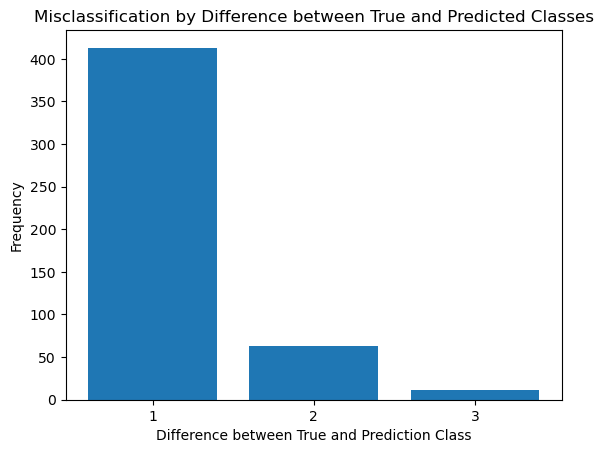

In [59]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

# Single Character Based

In [26]:
batch_size = 32
epochs = 6

model4 = Sequential()
model4.add(Conv2D(100, kernel_size=(2, 754),
                 activation='relu',
                 input_shape=(50,754,1)))
model4.add(Conv2D(100, (2, 1), activation='relu'))
model4.add(Conv2D(100, (2, 1), activation='relu'))
model4.add(MaxPooling2D(pool_size= (2,1)))
model4.add(Flatten())
model4.add(Dropout(0.5))
model4.add(Dense(4, activation='softmax'))

print(model4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 49, 1, 100)        150900    
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 1, 100)        20100     
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 1, 100)        20100     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 1, 100)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2300)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2300)              0         
                                                      

In [39]:
ann_viz(model4, view=True, filename = "methodCharacterCNNMi",
        title="CNN for Character Representation of Methods Using Mi et al. Method")

In [20]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

character_fit = model4.fit(x_characters_train4, y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_characters_test4, y_characters_test4))
character_score = model4.evaluate(x_characters_test4, y_characters_test4, verbose=0)
print('Test loss:', character_score[0])
print('Test accuracy:', character_score[1])

Epoch 1/6
205/205 [==============================] - 19s 84ms/step - loss: 1.1512 - accuracy: 0.5648 - val_loss: 0.8378 - val_accuracy: 0.6787
Epoch 2/6
205/205 [==============================] - 16s 78ms/step - loss: 0.8384 - accuracy: 0.6752 - val_loss: 0.8279 - val_accuracy: 0.6726
Epoch 3/6
205/205 [==============================] - 15s 74ms/step - loss: 0.8225 - accuracy: 0.6863 - val_loss: 0.7521 - val_accuracy: 0.6927
Epoch 4/6
205/205 [==============================] - 15s 76ms/step - loss: 0.7704 - accuracy: 0.6916 - val_loss: 0.7744 - val_accuracy: 0.6799
Epoch 5/6
205/205 [==============================] - 15s 71ms/step - loss: 0.7498 - accuracy: 0.6933 - val_loss: 0.7631 - val_accuracy: 0.6878
Epoch 6/6
205/205 [==============================] - 14s 70ms/step - loss: 0.7328 - accuracy: 0.7030 - val_loss: 0.7379 - val_accuracy: 0.7061
Test loss: 0.737924337387085
Test accuracy: 0.7060975432395935


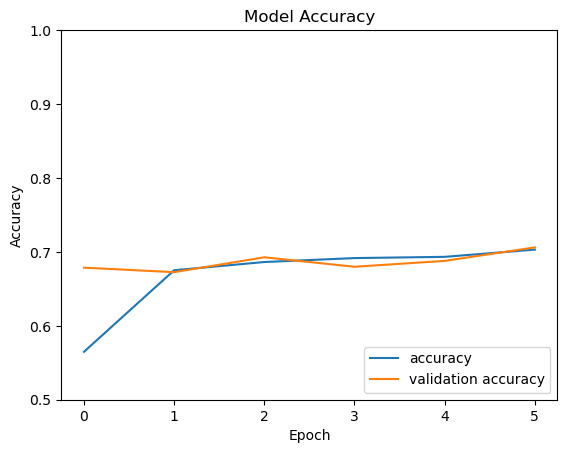

In [25]:
plt.plot(character_fit.history['accuracy'], label='accuracy')
plt.plot(character_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

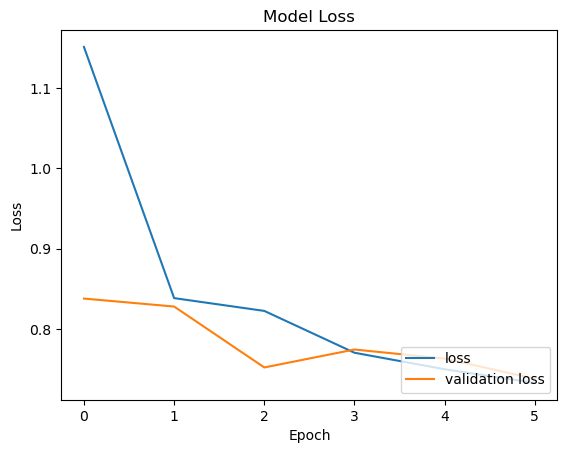

In [22]:
plt.plot(character_fit.history['loss'], label='loss')
plt.plot(character_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [23]:
mi_predict2 = model4.predict(x_characters_test4)

52/52 [==============================] - 2s 29ms/step


In [24]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_characters_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[313  71  14   3]
 [ 53 239  94  36]
 [  6  64 257  79]
 [  8   4  50 349]]


In [44]:
onemisclass = 71+94+79+53+64+50
twomisclass = 6+4+14+36
threemisclass =  8+3
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[411, 60, 11]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

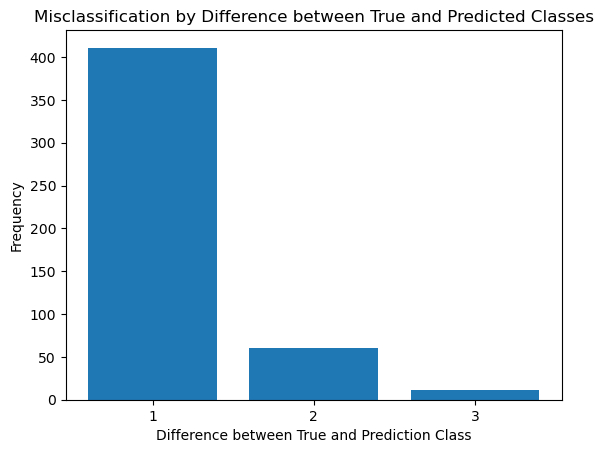

In [55]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

# Token Based

In [27]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

token_fit = model4.fit(x_tokens_train4, y_tokens_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_tokens_test4, y_tokens_test4))
token_score = model4.evaluate(x_tokens_test4, y_tokens_test4, verbose=0)
print('Test loss:', token_score[0])
print('Test accuracy:', token_score[1])

Epoch 1/6
205/205 [==============================] - 16s 77ms/step - loss: 1.1504 - accuracy: 0.5299 - val_loss: 0.9192 - val_accuracy: 0.6335
Epoch 2/6
205/205 [==============================] - 14s 68ms/step - loss: 0.8918 - accuracy: 0.6389 - val_loss: 0.8055 - val_accuracy: 0.6787
Epoch 3/6
205/205 [==============================] - 14s 68ms/step - loss: 0.8123 - accuracy: 0.6759 - val_loss: 0.7947 - val_accuracy: 0.6720
Epoch 4/6
205/205 [==============================] - 14s 66ms/step - loss: 0.7769 - accuracy: 0.6886 - val_loss: 0.7671 - val_accuracy: 0.6896
Epoch 5/6
205/205 [==============================] - 15s 74ms/step - loss: 0.7595 - accuracy: 0.6895 - val_loss: 0.7504 - val_accuracy: 0.7000
Epoch 6/6
205/205 [==============================] - 15s 73ms/step - loss: 0.7394 - accuracy: 0.6977 - val_loss: 0.7308 - val_accuracy: 0.7012
Test loss: 0.7307726740837097
Test accuracy: 0.7012194991111755


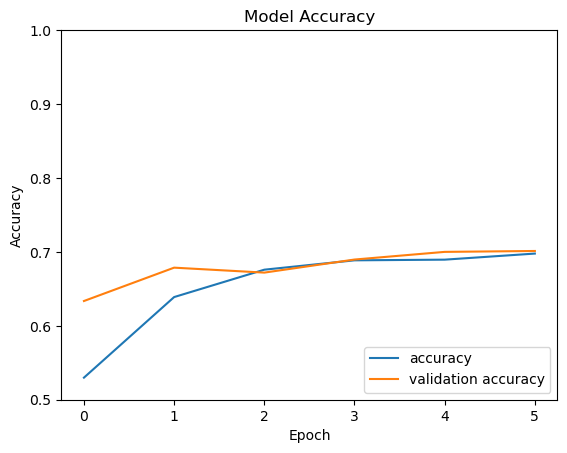

In [32]:
plt.plot(token_fit.history['accuracy'], label='accuracy')
plt.plot(token_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

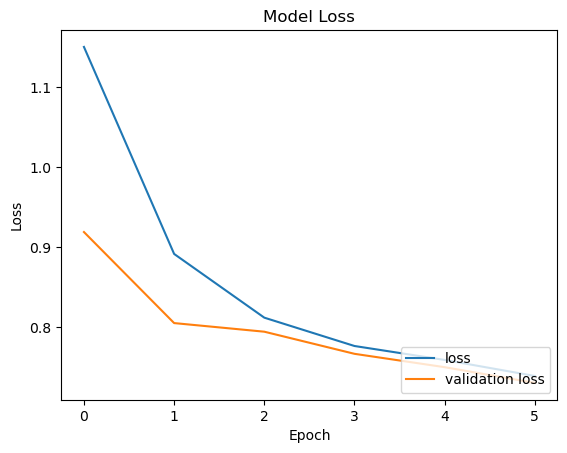

In [34]:
plt.plot(token_fit.history['loss'], label='loss')
plt.plot(token_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [35]:
mi_predict2 = model4.predict(x_tokens_test4)

52/52 [==============================] - 1s 19ms/step


In [36]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_tokens_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[314  72  10   5]
 [ 53 232 102  35]
 [ 10  50 265  81]
 [  7  10  55 339]]


In [56]:
onemisclass = 72+102+81+53+50+55
twomisclass = 10+10+10+35
threemisclass =  5+7
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[413, 65, 12]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

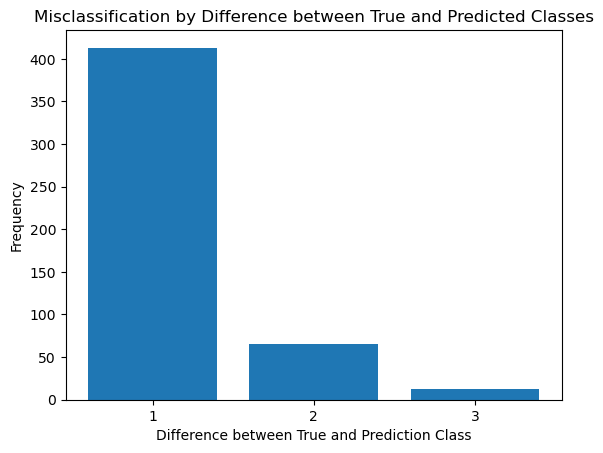

In [57]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')